Для задачи классификации ирисов Фишера:
1. Сформировать обучающую выборку, состоящую из 2 классов: virginica, versicolor.
2. Построить классификатор на основе нейронной сети с одним скрытым слоем.
3. Экспериментально определить количество нейронов в скрытом слое, обеспечивающее наилучшую вероятность правильного распознавания ВПР в среднем (для 5-кратного обучения на каждой структуры нейронной сети).
2. Построить график зависимости ВПР от количества нейронов в скрытом слое.
На основании этого набора данных требуется построить правило классификации, определяющее вид растения по данным измерений.

1)

In [51]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  

iris_data = pd.read_csv('/kaggle/input/iris/Iris.csv')
iris_data.head(10)
# next step to remove values of 'iris-setosa' 
iris_data.drop(iris_data[iris_data['Species'] == "Iris-setosa"].index, inplace=True)
iris_data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [52]:
# further to split array into random test subsets

Y_col = 'Species'
X_cols = iris_data.iloc[:, 1:5].columns
Y_col, X_cols

iris_train = iris_data.sample(frac=0.8, random_state=1)
iris_test = iris_data.drop(iris_train.index)

x_train = iris_train[X_cols]
x_test = iris_test[X_cols]
y_train = iris_train[Y_col]
y_test = iris_test[Y_col]

x_train.shape, x_test.shape

((80, 4), (20, 4))

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Compute the mean and standard deviation 
scaler.fit(x_train) 

# Perform standardization by centering and scaling
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_test.shape

(20, 4)

2)

In [54]:
#creating an classifier from the model
from sklearn.neural_network import MLPClassifier

# one hidden layer with 10 neurons
classifier = MLPClassifier(solver='adam', hidden_layer_sizes=(10,), max_iter = 1000)

# fit the training data to our model
classifier.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

In [55]:
from sklearn.metrics import accuracy_score

pred_train = classifier.predict(x_train)
print(f'Accuracy classification score by train: {accuracy_score(pred_train, y_train)}')

pred_test = classifier.predict(x_test)
print(f'Accuracy classification score by test: {accuracy_score(pred_test, y_test)}')

Accuracy classification score by train: 0.9625
Accuracy classification score by test: 0.9


                 precision    recall  f1-score   support

Iris-versicolor       0.85      1.00      0.92        11
 Iris-virginica       1.00      0.78      0.88         9

       accuracy                           0.90        20
      macro avg       0.92      0.89      0.90        20
   weighted avg       0.92      0.90      0.90        20



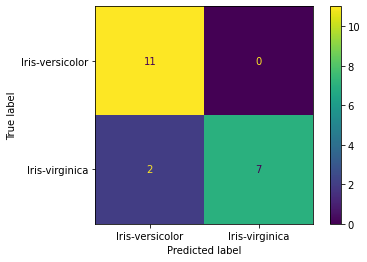

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

confusion_matrix(pred_train, y_train)
confusion_m = confusion_matrix(pred_test, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_m, display_labels = classifier.classes_)
disp.plot()

print(classification_report(pred_test, y_test))
